# Creating irregular time series
*R.A. Collenteur, University of Graz*

In this notebook it is shown how to create (synthetic) time series with irregular time steps for testing purposes. The file `irregular_ts_1993_2008.csv` contains the time indices from about 1000 head time series observed in the Netherlands. The first column contains the time stamps, and the other columns states whether a head observation was made (`=1`) on that day or not (`=0`). The time series come from real data and contain (large) data gaps and observation intervals between once a day to once a month.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## loading the data

In [2]:
data = pd.read_csv("irregular_ts_1993_2018.csv", index_col=0, parse_dates=True, header=None)
data.head()

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
0,,,,,,,,,,,,,,,,,,,,,
1993-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1993-01-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1993-01-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1993-01-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1993-01-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Creating time series
Below is an example of how the data can be used to create synthetic time series with irregular time intervals.

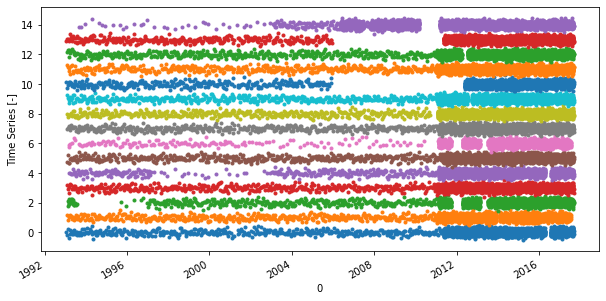

In [3]:
plt.subplots(1, 1, figsize=(10,5))

for i in range(15):
    index = data.index[data.iloc[:, i] > 0]
    ts = pd.Series(index=index, data=np.random.normal(0,0.15, len(index))) + i
    ts.plot(marker=".", linestyle=" ")
    
plt.ylabel("Time Series [-]");

## Plot of data availability
Here a plot of the data availability will be added later.

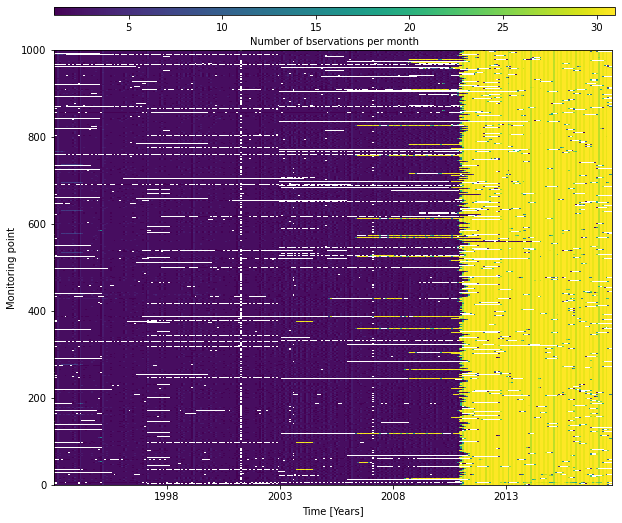

In [7]:
import copy
cmap = copy.copy(plt.cm.get_cmap("viridis"))
cmap.set_bad(color='white')

ts1 = data.copy().resample("M").sum().loc[:"2017-09-01"].replace(0, np.nan)
fig, ax = plt.subplots(1, 1, figsize=(10,8))
plt.pcolormesh(ts1.values.T, vmin=1,linewidth=0,rasterized=True);
ax.set_xlabel("Time [Years]")
ax.set_ylabel("Monitoring point");
ax.set_xticks(range(60, 296, 60))  # Months
ax.set_xticklabels([str(year) for year in range(1998, 2017, 5)]);
cax = fig.add_axes([0.125, 0.94, 0.78, 0.015]) 
plt.colorbar(fraction=0.1, shrink=0.5, orientation="horizontal", label="Number of bservations per month", cax=cax);
plt.savefig("irregular_timesteps.png", bbox_inches="tight", dpi=300)

## Data origin
This data comes from time series observed in the Southern part of the Netherlands and were kindly provided by the drinking water company [Brabant Water](https://www.brabantwater.nl). 